In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\elizabeth\Documents\Luca's scraping\standardised_education_tweets_19082020.csv")

In [3]:
#preprocessing - first glanses at the data 
column_names = list(df.columns)
unique_values = list()
for col in df:
    unique_values.append(df[col].unique())
number_unique_values = list()
for col in df:
    number_unique_values.append(len(df[col].unique()))

#a summary table fo unique information 
summary_table = pd.DataFrame(column_names)
summary_table.columns=['column names']
summary_table['unique values'] = unique_values
summary_table['number of unique values'] = number_unique_values
summary_table

,column names,unique values,number of unique values
0,tweet_id,"[1289278300456538112, 1289253559876194306, 128...",44028
1,conversation_id,"[1289172631829192707, 1289252076241842176, 128...",29513
2,in_reply_to_status_id,[nan],1
3,reply_to,"[[{'user_id': '314483971', 'username': 'alicew...",17966
4,in_reply_to_user_id,[nan],1
5,in_reply_to_screen_name,[nan],1
6,user_id,"[314483971, 13265, 46346940, 360667680, 391350...",48
7,screen_name,"[alicewoolley1, richarda, sarahjewell21, camil...",48
8,tweet_created_at,"[2020-07-31 21:14:35, 2020-07-31 19:36:16, 202...",43896
9,text,[There are transparent masks now that should h...,43266


In [46]:
df_like_count = df.groupby('screen_name')[['replies_count', 'retweets_count', 'likes_count']].sum()
df_number_tweets = df.groupby('screen_name')['text'].count()
df_like_count['number_tweets'] = df_number_tweets

In [5]:
df2 = pd.read_csv(r"C:\Users\elizabeth\Documents\Luca's scraping\education_user_profiles.csv")
#preprocessing - first glanses at the data 
column_names = list(df.columns)
unique_values = list()
for col in df:
    unique_values.append(df[col].unique())
number_unique_values = list()
for col in df:
    number_unique_values.append(len(df[col].unique()))

#a summary table fo unique information 
summary_table = pd.DataFrame(column_names)
summary_table.columns=['column names']
summary_table['unique values'] = unique_values
summary_table['number of unique values'] = number_unique_values
summary_table

,column names,unique values,number of unique values
0,tweet_id,"[1289278300456538112, 1289253559876194306, 128...",44028
1,conversation_id,"[1289172631829192707, 1289252076241842176, 128...",29513
2,in_reply_to_status_id,[nan],1
3,reply_to,"[[{'user_id': '314483971', 'username': 'alicew...",17966
4,in_reply_to_user_id,[nan],1
5,in_reply_to_screen_name,[nan],1
6,user_id,"[314483971, 13265, 46346940, 360667680, 391350...",48
7,screen_name,"[alicewoolley1, richarda, sarahjewell21, camil...",48
8,tweet_created_at,"[2020-07-31 21:14:35, 2020-07-31 19:36:16, 202...",43896
9,text,[There are transparent masks now that should h...,43266


In [6]:
df_user_metrics = pd.merge(df2, df_like_count, how='inner', on='screen_name')
df_user_metrics.head()

,user_id,screen_name,name,location,user_description,user_friends_n,user_followers_n,prof_created_at,favourites_count,verified,statuses_count,replies_count,retweets_count,likes_count,number_tweets
0,146366133,greenmiranda,Miranda Green,London,Journalist (Social commentator of the year 201...,2342,21822,2010-05-21 07:32:03,25778,True,27972,8842,9635,65729,4344
1,202377004,johndickenssw,John Dickens,London,Multi-award winning journo. Editor of educatio...,1391,4334,2010-10-13 22:33:58,4307,False,12158,2121,2974,7912,2030
2,80040195,fcdwhittaker,Freddie Whittaker,London via Stroud,Journalist. Chief reporter and political edito...,2276,6412,2009-10-05 14:40:31,4664,True,31396,1430,2959,10786,1406
3,224592767,branwenjeffreys,branwen jeffreys,LONDON a great world city,"BBC Education Editor - runs slow, reads faster...",2223,27870,2010-12-09 11:20:55,52,False,13027,1175,2239,7034,1077
4,13265,richarda,Richard Adams,United Kingdom,The Guardian's education editor - email me at ...,2578,18927,2006-11-20 15:41:59,9682,True,31177,1440,3445,8864,941


Text(0.5, 0, 'Number of tweets')

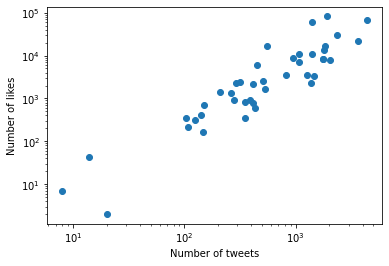

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df_user_metrics['number_tweets'], df_user_metrics['likes_count'])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Number of likes')
plt.xlabel('Number of tweets')

Text(0.5, 0, 'Number of tweets')

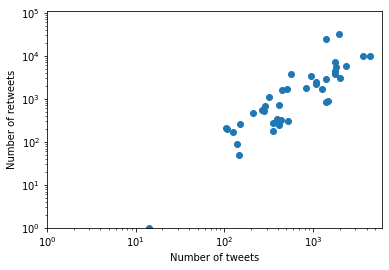

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df_user_metrics['number_tweets'], df_user_metrics['retweets_count'])
plt.yscale('log')
plt.xscale('log')
plt.ylim(1)
plt.xlim(1)
plt.ylabel('Number of retweets')
plt.xlabel('Number of tweets')

Text(0.5, 0, 'Number of tweets')

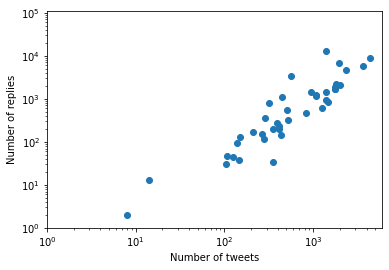

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df_user_metrics['number_tweets'], df_user_metrics['replies_count'])
plt.yscale('log')
plt.xscale('log')
plt.ylim(1)
plt.xlim(1)
plt.ylabel('Number of replies')
plt.xlabel('Number of tweets')

In [10]:
df_user_metrics['engagement_metric'] = (df_user_metrics['likes_count'] + 
                                        df_user_metrics['retweets_count'])/(
                                        df_user_metrics['number_tweets']*
                                        df_user_metrics['user_followers_n'])

Text(0.5, 0, 'Number of tweets')

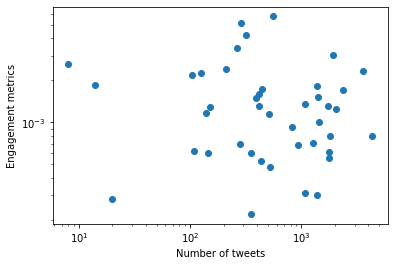

In [11]:
plt.scatter(df_user_metrics['number_tweets'], df_user_metrics['engagement_metric'])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Engagement metrics')
plt.xlabel('Number of tweets')

# h-index likes and retweets

In [ ]:
df['retweets&likes'] = df['retweets_count'] + df['likes_count']

def hindex(citations):
    """
    :type citations: List[int]
    :rtype: int
    """
    citations = sorted(citations, reverse=True)
    for idx, item in enumerate(citations, 1):
        if item < idx:
            break
    return idx - 1

hdict = {}
for user_name in list(df['screen_name'].unique()):
    like_list = list(df[df['screen_name']==user_name]['retweets&likes'].values)
    h= hindex(like_list)
    hdict[user_name]=h

hdict = {k: v for k, v in sorted(hdict.items(), key=lambda item: item[1], reverse=True)}
hdict

In [27]:
hdict_df = pd.DataFrame(hdict.items())
hdict_df.columns = ['screen_name', 'h-index_like&retweets']
df_user_metrics = pd.merge(df_user_metrics, hdict_df, how='inner', on='screen_name')

df_user_metrics

,user_id,screen_name,name,location,user_description,user_friends_n,user_followers_n,prof_created_at,favourites_count,verified,statuses_count,replies_count,retweets_count,likes_count,number_tweets,engagement_metric,h-index,h-index_like&retweets
0,146366133,greenmiranda,Miranda Green,London,Journalist (Social commentator of the year 201...,2342,21822,2010-05-21 07:32:03,25778,True,27972,8842,9635,65729,4344,0.000795,100,100
1,202377004,johndickenssw,John Dickens,London,Multi-award winning journo. Editor of educatio...,1391,4334,2010-10-13 22:33:58,4307,False,12158,2121,2974,7912,2030,0.001237,38,38
2,80040195,fcdwhittaker,Freddie Whittaker,London via Stroud,Journalist. Chief reporter and political edito...,2276,6412,2009-10-05 14:40:31,4664,True,31396,1430,2959,10786,1406,0.001525,44,44
3,224592767,branwenjeffreys,branwen jeffreys,LONDON a great world city,"BBC Education Editor - runs slow, reads faster...",2223,27870,2010-12-09 11:20:55,52,False,13027,1175,2239,7034,1077,0.000309,35,35
4,13265,richarda,Richard Adams,United Kingdom,The Guardian's education editor - email me at ...,2578,18927,2006-11-20 15:41:59,9682,True,31177,1440,3445,8864,941,0.000691,48,48
5,21655680,sanchia7,Sanchia Berg,London,Award winning BBC Correspondent/Reporter:Today...,1783,5743,2009-02-23 14:26:22,17758,False,24227,627,1656,3501,1263,0.000711,28,28
6,274620149,seanjcoughlan,Sean Coughlan,London,"Journalist, author, broadcaster. BBC News educ...",1836,11047,2011-03-30 17:07:14,0,False,12115,1715,3675,8188,1755,0.000612,38,38
7,373296066,alijkershaw,Alison Kershaw,London,Law Correspondent at PA. Previously covered ed...,1177,3060,2011-09-14 10:11:55,333,True,1991,92,88,408,140,0.001158,9,9
8,262159650,whazell,Will Hazell,London,"Education Correspondent @theipaper, formerly @...",1902,5600,2011-03-07 13:48:56,1946,True,13383,1926,4329,8512,1746,0.001313,41,41
9,472984050,eleanor_busby,Eleanor Busby,"London, England",Education correspondent at @PA. Former @indepe...,1741,3703,2012-01-24 14:28:52,1254,False,4376,168,472,1402,209,0.002421,17,17


In [14]:
import matplotlib.pyplot as plt

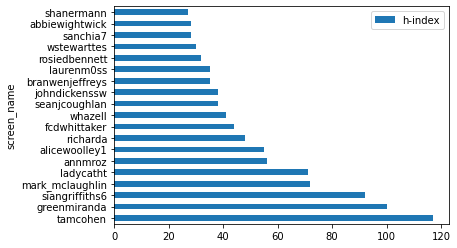

In [28]:
df_user_metrics_sorted = df_user_metrics.sort_values(['h-index_like&retweets'], ascending=False)
df_user_metrics_sorted_subset = df_user_metrics_sorted[0:19]
ax = df_user_metrics_sorted_subset.plot.barh(x='screen_name', y='h-index')

# h-index for replies

In [29]:
hdict = {}
for user_name in list(df['screen_name'].unique()):
    like_list = list(df[df['screen_name']==user_name]['replies_count'].values)
    h= hindex(like_list)
    hdict[user_name]=h

hdict = {k: v for k, v in sorted(hdict.items(), key=lambda item: item[1], reverse=True)}

hdict_df = pd.DataFrame(hdict.items())
hdict_df.columns = ['screen_name', 'h-index_replies']
df_user_metrics = pd.merge(df_user_metrics, hdict_df, how='inner', on='screen_name')

df_user_metrics

,user_id,screen_name,name,location,user_description,user_friends_n,user_followers_n,prof_created_at,favourites_count,verified,statuses_count,replies_count,retweets_count,likes_count,number_tweets,engagement_metric,h-index,h-index_like&retweets,h-index_replies
0,146366133,greenmiranda,Miranda Green,London,Journalist (Social commentator of the year 201...,2342,21822,2010-05-21 07:32:03,25778,True,27972,8842,9635,65729,4344,0.000795,100,100,27
1,202377004,johndickenssw,John Dickens,London,Multi-award winning journo. Editor of educatio...,1391,4334,2010-10-13 22:33:58,4307,False,12158,2121,2974,7912,2030,0.001237,38,38,10
2,80040195,fcdwhittaker,Freddie Whittaker,London via Stroud,Journalist. Chief reporter and political edito...,2276,6412,2009-10-05 14:40:31,4664,True,31396,1430,2959,10786,1406,0.001525,44,44,10
3,224592767,branwenjeffreys,branwen jeffreys,LONDON a great world city,"BBC Education Editor - runs slow, reads faster...",2223,27870,2010-12-09 11:20:55,52,False,13027,1175,2239,7034,1077,0.000309,35,35,13
4,13265,richarda,Richard Adams,United Kingdom,The Guardian's education editor - email me at ...,2578,18927,2006-11-20 15:41:59,9682,True,31177,1440,3445,8864,941,0.000691,48,48,12
5,21655680,sanchia7,Sanchia Berg,London,Award winning BBC Correspondent/Reporter:Today...,1783,5743,2009-02-23 14:26:22,17758,False,24227,627,1656,3501,1263,0.000711,28,28,6
6,274620149,seanjcoughlan,Sean Coughlan,London,"Journalist, author, broadcaster. BBC News educ...",1836,11047,2011-03-30 17:07:14,0,False,12115,1715,3675,8188,1755,0.000612,38,38,10
7,373296066,alijkershaw,Alison Kershaw,London,Law Correspondent at PA. Previously covered ed...,1177,3060,2011-09-14 10:11:55,333,True,1991,92,88,408,140,0.001158,9,9,4
8,262159650,whazell,Will Hazell,London,"Education Correspondent @theipaper, formerly @...",1902,5600,2011-03-07 13:48:56,1946,True,13383,1926,4329,8512,1746,0.001313,41,41,11
9,472984050,eleanor_busby,Eleanor Busby,"London, England",Education correspondent at @PA. Former @indepe...,1741,3703,2012-01-24 14:28:52,1254,False,4376,168,472,1402,209,0.002421,17,17,5


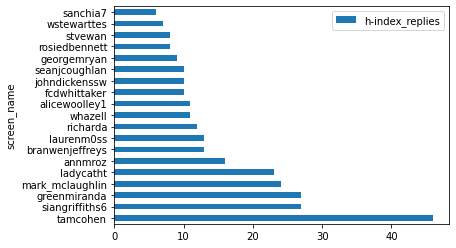

In [31]:
df_user_metrics_sorted = df_user_metrics.sort_values(['h-index_replies'], ascending=False)
df_user_metrics_sorted_subset = df_user_metrics_sorted[0:19]
ax = df_user_metrics_sorted_subset.plot.barh(x='screen_name', y='h-index_replies')

In [ ]:
for i in np.arange(1,40):
    df = pd.read_csv('//content//drive//My Drive/Colab Notebooks//datasets//cyber_friends_tweets//cyber_friends_tweets_subset_' + str(i) + '.csv')
    stand = standard_tweet_dataset_setup()
    standard_API = fill_standard_tweet_dataset_with_API(stand,df)
    df_like_count = pd.concat([df_like_count,standard_API.groupby('screen_name')[['retweets_count', 'likes_count']].sum()])
    print(i)